In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [4]:
sales = pd.read_csv('./kc_house_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
train_data = pd.read_csv('./wk3_kc_house_train_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
valid_data = pd.read_csv('./wk3_kc_house_valid_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
test_data = pd.read_csv('./wk3_kc_house_test_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

set1_data = pd.read_csv('./wk3_kc_house_set_1_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set2_data = pd.read_csv('./wk3_kc_house_set_2_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set3_data = pd.read_csv('./wk3_kc_house_set_3_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
set4_data = pd.read_csv('./wk3_kc_house_set_4_data.csv', dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})


In [ ]:
tmp_cubed = tmp.apply(lambda x: x**3)

In [89]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power)
    return poly_dataframe

In [90]:
sales = sales.sort(['sqft_living','price'])

/Users/shute/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [91]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [92]:
lm1 = linear_model.LinearRegression()
lm1.fit(poly1_data[['power_1']], poly1_data[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

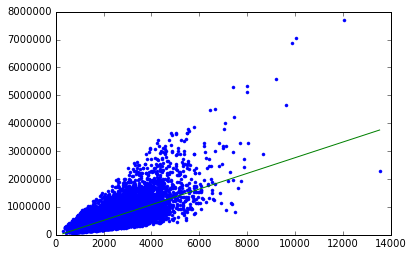

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
         poly1_data['power_1'], lm1.predict(poly1_data[['power_1']]).reshape(-1 ,1),'-')

In [99]:
var = []
for power in range(1, 16):
    # first we'll give the column a name:
    name = 'power_' + str(power)
    var.append(name)

In [100]:
print var

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


In [101]:
poly_set1_data = polynomial_dataframe(set1_data['sqft_living'], 15)
poly_set1_data['price'] = set1_data['price']
lm_set1 = linear_model.LinearRegression()
lm_set1.fit(poly_set1_data[var], poly_set1_data[['price']])
print lm_set1.coef_
print lm_set1.intercept_

[[  3.05794168e-90  -1.69394899e-49  -5.61775564e-55  -4.97841222e-60
    0.00000000e+00   1.10358351e-70   8.37724029e-67   6.23411957e-63
    4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
    3.62176959e-44  -5.63501661e-48   2.18641116e-52]]
[ 539058.81866871]


In [102]:
poly_set2_data = polynomial_dataframe(set2_data['sqft_living'], 15)
poly_set2_data['price'] = set2_data['price']
lm_set2 = linear_model.LinearRegression()
lm_set2.fit(poly_set2_data[var], poly_set2_data[['price']])
print lm_set2.coef_
print lm_set2.intercept_

[[  2.71335943e-77   7.33542378e-39  -1.85052501e-44   1.39007354e-49
    0.00000000e+00   0.00000000e+00   3.64549213e-55   1.50416255e-51
    5.76015653e-48   1.95770493e-44   5.39396528e-41   9.40376341e-38
   -3.63529134e-41   4.65476514e-45  -1.97194701e-49]]
[ 506567.31348149]


In [103]:
poly_set3_data = polynomial_dataframe(set3_data['sqft_living'], 15)
poly_set3_data['price'] = set3_data['price']
lm_set3 = linear_model.LinearRegression()
lm_set3.fit(poly_set3_data[var], poly_set3_data[['price']])
print lm_set3.coef_
print lm_set3.intercept_

[[  2.83751934e-88  -7.80224144e-49   4.71701447e-55   0.00000000e+00
    0.00000000e+00   4.27894986e-69   2.68009626e-65   1.63911362e-61
    9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
    3.33756141e-43  -6.76238818e-47   3.43132932e-51]]
[ 530874.31665308]


In [104]:
poly_set4_data = polynomial_dataframe(set4_data['sqft_living'], 15)
poly_set4_data['price'] = set4_data['price']
lm_set4 = linear_model.LinearRegression()
lm_set4.fit(poly_set4_data[var], poly_set4_data[['price']])
print lm_set4.coef_
print lm_set4.intercept_

[[  1.37116050e-76   2.79679298e-40  -4.25065581e-44   6.00446563e-50
    0.00000000e+00   0.00000000e+00   1.27070051e-54   4.87868972e-51
    1.73549022e-47   5.47058320e-44   1.39587599e-40   2.25041871e-37
   -9.43954119e-41   1.31573060e-44  -6.09160663e-49]]
[ 494780.65082273]


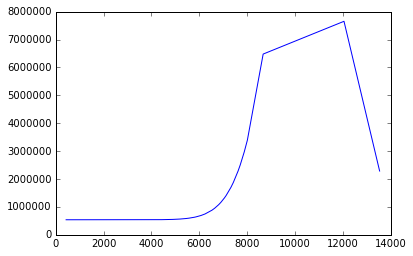

In [106]:
plt.plot(poly_set1_data[['power_1']], lm_set1.predict(poly_set1_data[var]),'-')

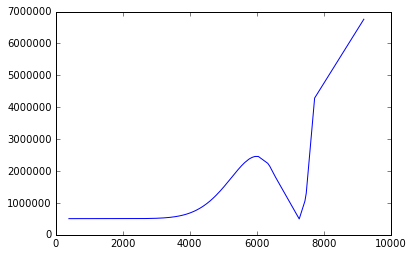

In [107]:
plt.plot(poly_set2_data[['power_1']], lm_set2.predict(poly_set2_data[var]),'-')

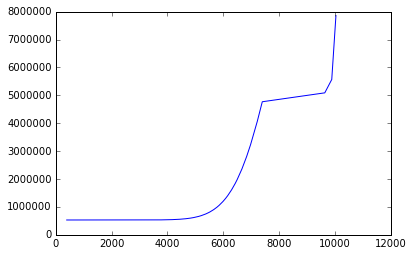

In [108]:
plt.plot(poly_set3_data[['power_1']], lm_set3.predict(poly_set3_data[var]),'-')

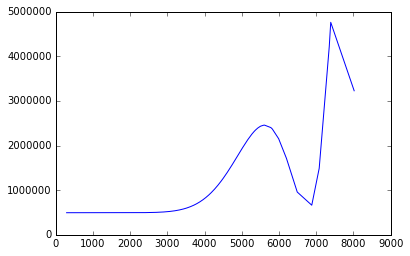

In [109]:
plt.plot(poly_set4_data[['power_1']], lm_set4.predict(poly_set4_data[var]),'-')

In [127]:
varb = []
for i in range(1, 7) :
    name = 'power_' + str(i)
    varb.append(name)
    poly_set_data = polynomial_dataframe(train_data['sqft_living'], i)
    poly_set_data['price'] = train_data['price']
    lm_set = linear_model.LinearRegression()
    lm_set.fit(poly_set_data[varb], poly_set_data[['price']])

    poly_vali_data = polynomial_dataframe(valid_data['sqft_living'], i)
    poly_vali_data['price'] = valid_data['price']

    print 'The %d degree:' % i
    RSS = ((poly_vali_data[['price']] - lm_set.predict(poly_vali_data[varb]))**2).sum()
    print RSS

The 1 degree:
price    6.290979e+14
dtype: float64
The 2 degree:
price    6.239551e+14
dtype: float64
The 3 degree:
price    6.258203e+14
dtype: float64
The 4 degree:
price    6.299873e+14
dtype: float64
The 5 degree:
price    6.282384e+14
dtype: float64
The 6 degree:
price    5.662686e+14
dtype: float64


In [120]:
# The 6th degree is the best choice

pandas.core.series.Series

In [134]:
poly_test_data = polynomial_dataframe(test_data['sqft_living'], 6)
poly_test_data['price'] = test_data['price']
RSS = ((poly_test_data[['price']] - lm_set.predict(poly_test_data[varb]))**2).sum()

In [135]:
RSS

price    1.352251e+14
dtype: float64